# Cointegration and Options

### Notebook by [Marco Tavora](https://marcotavora.me/)

## Table of contents

1. [Introduction](#Introduction)

## Introduction
[[go back to the top]](#Table-of-contents)

A very simple model for option hedging based on cointegrated vectors is:

\begin{eqnarray}
&& \ln \left( {\frac{{S_t^{(i)}}}{{S_{t - 1}^{(i)}}}} \right) = {r_f} - d_t^{(i)} - \frac{1}{2}{(\sigma _t^{(i)})^2} + {\eta _i}\sigma _t^{(i)} + z_{t - 1}^{(j)}{\xi _i} + \vec \sigma _t^{(i)} \cdot \varepsilon _t^{(i)} \nonumber\\
&&{{\vec \sigma }_t} = {{\vec \beta }_0} + ({{\vec \beta }_1} + {{\vec \beta }_2}||{{\vec \varepsilon }_{t - 1}} - \vec \theta |{|^2}) \cdot \vec \sigma _{t - 1}^2\nonumber\\
&&{z_t} = \alpha + \beta t+ {\gamma _1}\ln (S_t^{(1)}) + {\gamma _2}\ln (S_t^{(2)})
\end{eqnarray}


The inclusion of a *stationary* process ${z_t}$ presupposes that in the long-run, stationarity is eventually achieved. Note also that only one $\gamma_i$ is independent due to cointegration parametric invariance. The volatility is a simple GARCH(1,1) process. To control for growth and violation of mean reverting behavior, we added a deterministic term to ${z_t}$ process.

## Quick Review
[[go back to the top]](#Table-of-contents)


### VEC Model

Consider the following VAR model where the series are either $I(0)$ or $I(1)$:

\begin{array}{l}
{y_t} = {\beta _{10}} + {\beta _{11}}{y_{t - 1}} + \,{\beta _{12}}{x_{t - 1}} + \nu _t^y\\
{x_t} = {\beta _{20}} + {\beta _{21}}{y_{t - 1}} + \,{\beta _{22}}{x_{t - 1}} + \nu _t^x
\end{array}

If both time series are cointegrated, a VEC model is obtained by taken this into account as:

$${y_t} = {\beta _0} + {\beta _1}{x_t} + {e_t}$$

or

$${y_t} - {\beta _0} - {\beta _1}{x_t} = {e_t}$$

where ${e_t}$ is stationary. To estimate the coefficients of the VEC model we first estimate

$${{\hat e}_t} = {y_t} - {\beta _0} - {\beta _1}{x_t}$$

and then estimate 

\begin{array}{l}
\Delta {y_t} = {\alpha _{10}} + {\alpha _{11}} + \,{{\hat e}_{t - 1}} + \nu _t^y\\
\Delta {x_t} = {\alpha _{20}} + {\alpha _{21}} + \,\,{{\hat e}_{t - 1}} + \nu _t^x
\end{array}

### Example of VEC Model

In [36]:
rm(list=ls()) 
library(tseries)
library(dynlm)
library(vars)
library(nlWaldTest) 
library(lmtest)
library(broom) 
library(car)
library(sandwich)
library(knitr)
library(forecast) 

In [118]:
gdp <- read.csv('gdp.csv')
colnames(gdp) <- c('year', 'usa', 'aus')
head(gdp)

year,usa,aus
1960,543.3,18.57
1961,563.3,19.65
1962,605.1,19.89
1963,638.6,21.50
1964,685.8,23.76
1965,743.7,25.93


In [119]:
usa <- gdp[, c('year', 'usa')]
aus <- gdp[, c('year', 'aus')]
head(usa)
head(aus)

year,usa
1960,543.3
1961,563.3
1962,605.1
1963,638.6
1964,685.8
1965,743.7


year,aus
1960,18.57
1961,19.65
1962,19.89
1963,21.50
1964,23.76
1965,25.93


In [120]:
usa <- ts(usa, start=c(1970,1), end=c(2000,4), frequency=1)
aus <- ts(aus, start=c(1970,1), end=c(2000,4), frequency=1)

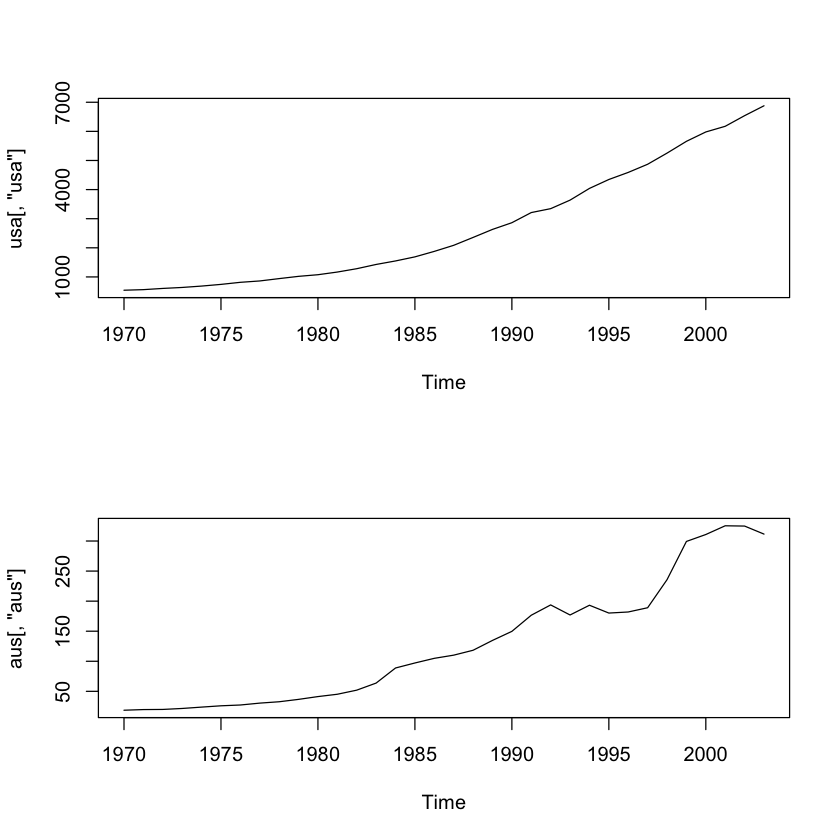

In [137]:
par(mfrow = c(2,1))
plot.ts(usa[,'usa'], 
        type='l')
plot.ts(aus[,'aus'], 
        type='l')

### Testing for nonstationarity

We see below that both series are $I(1)$.

In [157]:
print('p-values USA:')
adf.test(gdp[,'usa'])$p.value
print('p-values Australia:')
adf.test(gdp[,'aus'])$p.value
print('p-values diff(usa):')
adf.test(diff(gdp[,'usa']))$p.value
print('p-values diff(aus):')
adf.test(diff(gdp[,'aus']))$p.value

[1] "p-values USA:"


[1] 0.9194551

[1] "p-values Australia:"


[1] 0.8421995

[1] "p-values diff(usa):"


Warning message in adf.test(diff(gdp[, "usa"])):
“p-value smaller than printed p-value”

[1] 0.01

[1] "p-values diff(aus):"


[1] 0.0154855

### Testing for cointegration

$${\rm{au}}{{\rm{s}}_t} = {\beta _1}{\rm{us}}{{\rm{a}}_t} + {e_t} \Rightarrow {e_t} = {\rm{au}}{{\rm{s}}_t} - {\beta _1}{\rm{us}}{{\rm{a}}_t}$$

In [284]:
cint1.dyn <- dynlm(aus~usa-1, data=gdp)
kable(tidy(cint1.dyn), digits=3, caption="The results of the cointegration equation 'cint1.dyn'")



|term | estimate| std.error| statistic| p.value|
|:----|--------:|---------:|---------:|-------:|
|usa  |    0.065|     0.002|     27.49|       0|

In [369]:
ehat <- resid(cint1.dyn)
ehat <- ts(ehat, start=c(1970,1), end=c(2000,4), frequency=1)
x2 <- diff(ehat)
x3 <- lag(ehat)
m1 <- data.frame(cbind(x2, x3))
m1<- m1[c(3:length(x2)),]
head(m1)

,x2,x3
3,-0.2232648,-19.54028
4,-2.4838234,-20.11324
5,-0.5729685,-20.92895
6,-0.8157049,-22.53190
7,-1.6029516,-25.84804
8,-3.3161390,-25.76116


In [371]:
lm.m1 <- dynlm(x2 ~ x3-1, data=gdp)
summary(lm.m1)


Time series regression with "ts" data:
Start = 1971, End = 2002

Call:
dynlm(formula = x2 ~ x3 - 1, data = gdp)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.976  -2.316   0.868   2.896  43.808 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)  
x3  0.08353    0.03671   2.275     0.03 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.82 on 31 degrees of freedom
Multiple R-squared:  0.1431,	Adjusted R-squared:  0.1155 
F-statistic: 5.177 on 1 and 31 DF,  p-value: 0.02995


In [372]:
len = length(fitted(lm.m1))-1
fit <- fitted(lm.m1)[c(1:len)]
head(fit)

[1] -1.632270 -1.680132 -1.748271 -1.882171 -2.159180 -2.151923

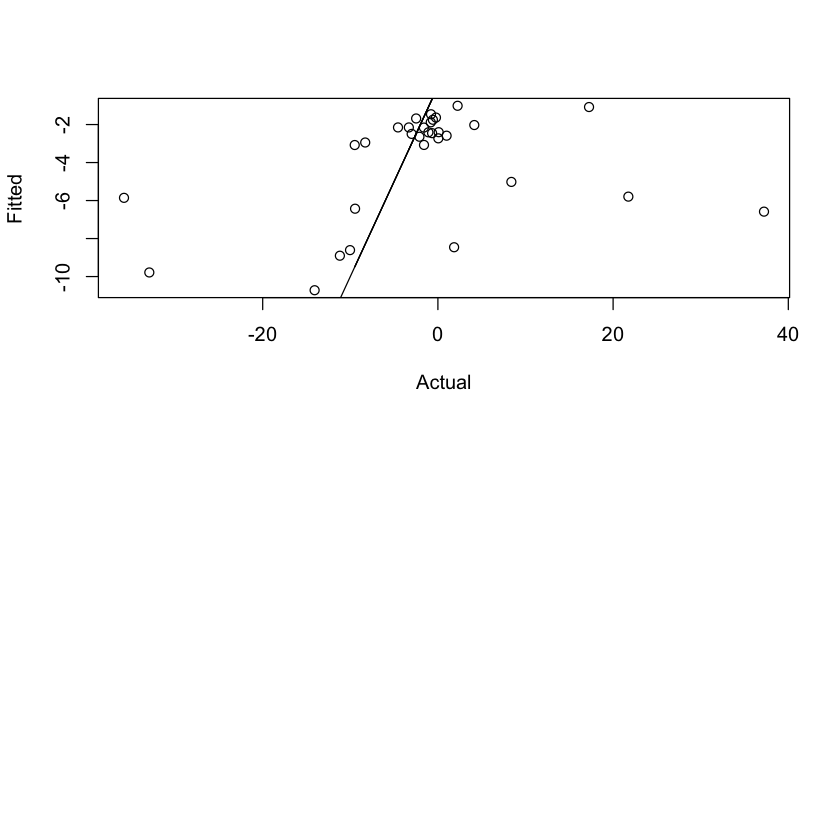

In [375]:
par(mfrow = c(2,1))
plot(m1$x2, fit, col='black',
     xlab="Actual", ylab="Fitted")
lines(m1$x2, m1$x2, col='black')

In [281]:
length(ehat$d)
length(ehat$L)

ERROR: Error in ehat$d: $ operator is invalid for atomic vectors


In [ ]:
ehat$d <- diff(ehat)
ehat$L <- lag(ehat)
head(ehat)

In [202]:
df.lm <- lm(d~L-1, data=ehat)
summary(df.lm)

ERROR: Error in model.frame.default(formula = d ~ L - 1, data = ehat, drop.unused.levels = TRUE): invalid type (list) for variable 'L'
